In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls

In [2]:
img = cv2.imread('figs/lena.png',cv2.IMREAD_GRAYSCALE)

In [3]:
# Cria variavel do tipo struct (similar ao matlab):
# Método da biblioteca cedida pela professor Navar M. M. Nascimento (IFCE)
Filter = nf.structtype()                
Filter.img = np.array(img)
Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

# Parâmetros para o Filtro da média
# Kernel def:
Filter.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

In [4]:
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.filterMedian(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.filterMedian(Filter)
        print(U[k,:,:])

################################
Process finished
Filter have been applied
################################
[[  0.  73.  73. ...  39.  39.   0.]
 [ 73.  73.  73. ...  44.  45.  39.]
 [ 73.  73.  73. ...  44.  45.  44.]
 ...
 [228. 228. 235. ... 102. 107. 107.]
 [224. 228. 228. ... 102. 107. 107.]
 [  0. 224. 228. ...  99. 102.   0.]]


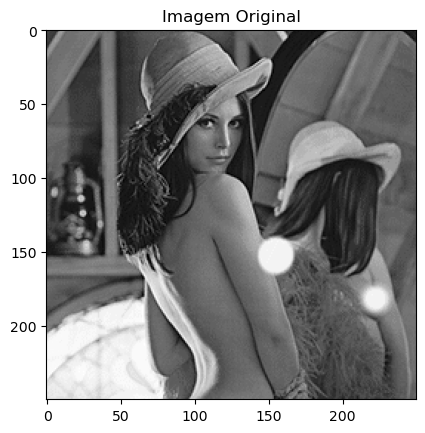

In [5]:
######### Using matplotlib #################
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

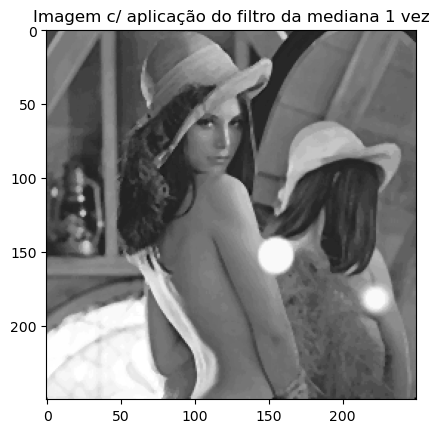

In [6]:
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Imagem c/ aplicação do filtro da mediana %d vez' %numAp)
plt.show()

In [7]:
kernelMean = np.ones((3,3))
print("Kernel para filtro da média:")
print(kernelMean)

kernelMedian = np.ones((3,3))
print("Kernel para filtro da mediana:")
print(kernelMedian)

Kernel para filtro da média:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Kernel para filtro da mediana:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [8]:
vizPixel = np.array([[150, 13, 200],
                     [20, 27, 39],
                     [50, 80, 90]])
print("Vizinhança ao redor do pixel de valor 27")
print(vizPixel)

Vizinhança ao redor do pixel de valor 27
[[150  13 200]
 [ 20  27  39]
 [ 50  80  90]]


In [9]:
print("Valor do novo pixel submetido ao filtro da média:")
print(int(np.sum((vizPixel*kernelMean))/9))

print("Valor do novo pixel submetido ao filtro da mediana:")
buffer = np.sort(np.ravel(vizPixel*kernelMean))
int(buffer[int(np.floor(9/2))])

Valor do novo pixel submetido ao filtro da média:
74
Valor do novo pixel submetido ao filtro da mediana:


50